# Practicing TensorFlow

This is a beginner series on how to properly use [TensorFlow](https://www.tensorflow.org/tutorials/quickstart/beginner) where the goal is to create:
- Build a neural network that classifies images
- Train this newly made neural network
- And, to finally evaluate the accuracy of the model

Tons of fun!


The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.
This database is used to teach beginners (like me) to create image classifiers from neural networks.

In [49]:
# Essential Imports
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

# Create a MNIST Dataset
mnist = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

2.4.0-dev20200812


## Preprocess the data

Each image is mapped to a single label. Since the class names are not included with the dataset, store them here to use later when plotting the images.

In [50]:
# 10 hand written digits and their corresponding titles
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

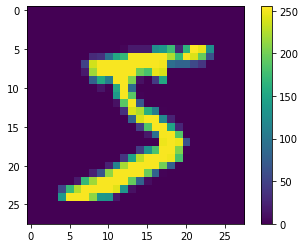

In [51]:
# Taking a look at the first encoded digit, it kinda looks like a '5'
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way. To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the training set and display the class name below each image.

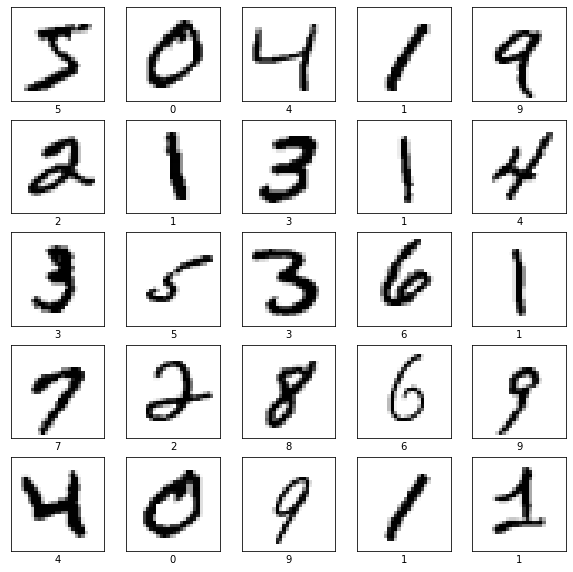

In [52]:
# Convert pixel values into an inclusive range of 0 to 1 for optimized processing
train_images = train_images / 255.0
test_images = test_images / 255.0

# Now let's take a look!
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Create and Train the Model

Build the neural network from `tf.keras.Sequential` model by feeding it 28 x28 Numpy arrays!


In [53]:
# Set my model to take in 28 x 28 NumPy arrays
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

In [54]:
# Feed my model with data to determine predictions from the first number in the training import MNIST dataset
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.14342973, -0.33807182, -0.35949   , -0.42470706, -0.3064923 ,
        -0.10072426,  0.05744457, -0.18585578, -0.00600276, -0.00685192]],
      dtype=float32)

In [55]:
# The tf.nn.softmax function converts these logits to "probabilities" for each class
# Not a recomended for interpreting exact and numerical stable loss calculations
tf.nn.softmax(predictions).numpy()

array([[0.13211873, 0.08163022, 0.07990043, 0.07485585, 0.0842492 ,
        0.10349746, 0.12123319, 0.09505118, 0.1137802 , 0.11368362]],
      dtype=float32)

In [56]:
# The losses.SparseCategoricalCrossentropy loss takes a vector of logits and a True index and returns a scalar loss for each example
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], predictions).numpy()

# My model will have its parameters be set up to ensure that the losses will be minized
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 959us/step - loss: 0.4770 - accuracy: 0.8583
Epoch 2/10
1875/1875 [==============================] - 1s 793us/step - loss: 0.1508 - accuracy: 0.9557
Epoch 3/10
1875/1875 [==============================] - 1s 790us/step - loss: 0.1087 - accuracy: 0.9676
Epoch 4/10
1875/1875 [==============================] - 2s 835us/step - loss: 0.0879 - accuracy: 0.9727
Epoch 5/10
1875/1875 [==============================] - 2s 817us/step - loss: 0.0736 - accuracy: 0.9765
Epoch 6/10
1875/1875 [==============================] - 1s 791us/step - loss: 0.0647 - accuracy: 0.9789
Epoch 7/10
1875/1875 [==============================] - 2s 826us/step - loss: 0.0561 - accuracy: 0.9819
Epoch 8/10
1875/1875 [==============================] - 2s 829us/step - loss: 0.0467 - accuracy: 0.9849
Epoch 9/10
1875/1875 [==============================] - 2s 842us/step - loss: 0.0461 - accuracy: 0.9845
Epoch 10/10
1875/1875 [==============================] - 2s 835u

The `Model.evaluate` method checks the models performance, usually on a "Validation-set" or "Test-set". As seen below, the image classifier is now trained to ~98% accuracy on this dataset.

In [57]:
# Run the model
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.0706 - accuracy: 0.9799


[0.07055068016052246, 0.9799000024795532]

## Test Model Predictions!

With the model trained, you can use it to make predictions about some images. The model's linear outputs, logits. Attach a softmax layer to convert the logits to probabilities, which are easier to interpret.

In [58]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

# Get my model's prediction of what number it thinks it's found from the first 
predictions = probability_model.predict(test_images)
np.argmax(predictions[0])

7

## Verify Predictions from Model

With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

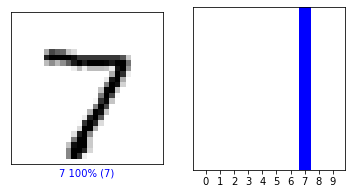

In [59]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

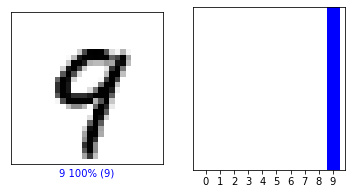

In [60]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

In [61]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

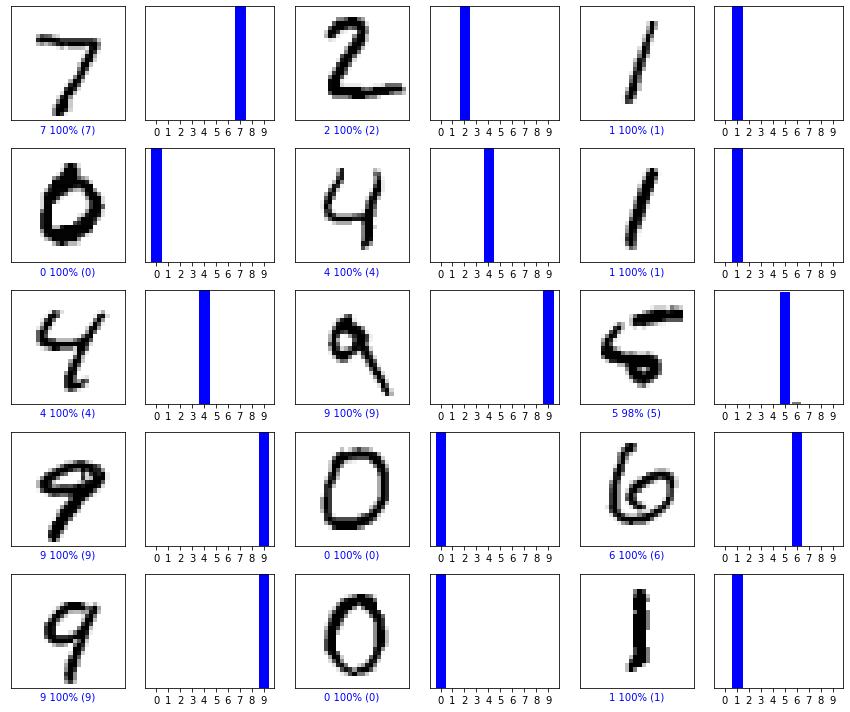

In [62]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Use the trained model

Finally, use the trained model to make a prediction about a single image.

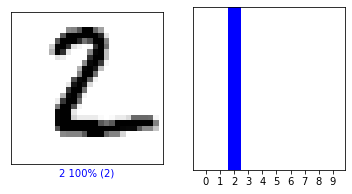

Model thinks it's a 2


In [78]:
# Grab an image from the test dataset.
img = test_images[1]

# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))
predictions_single = probability_model.predict(img)

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(1, predictions[1], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(1, predictions[1],  test_labels)
plt.show()

print("Model thinks it's a {}".format(np.argmax(predictions_single[0])))